In [46]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

**Task 1**

In [47]:
# Station coordinates base on Apple Map 
stations = {
    "Holborn": (51.517135, -0.120327),  
    "Covent Garden": (51.513124, -0.124221),
    "Leicester Square": (51.511390, -0.128366),
    "Piccadilly Circus": (51.509792, -0.134336),  
    "Green Park": (51.506800, -0.142481),    
    "Hyde Park Corner": (51.502958, -0.152624),
}

# Distance stations in km base on Apple Map
edges = [
        ("Holborn", "Covent Garden", 0.6),
        ("Covent Garden", "Leicester Square", 0.3),
        ("Leicester Square", "Piccadilly Circus", 0.45),
        ("Piccadilly Circus", "Green Park", 0.6),
        ("Green Park", "Hyde Park Corner", 0.8)
]

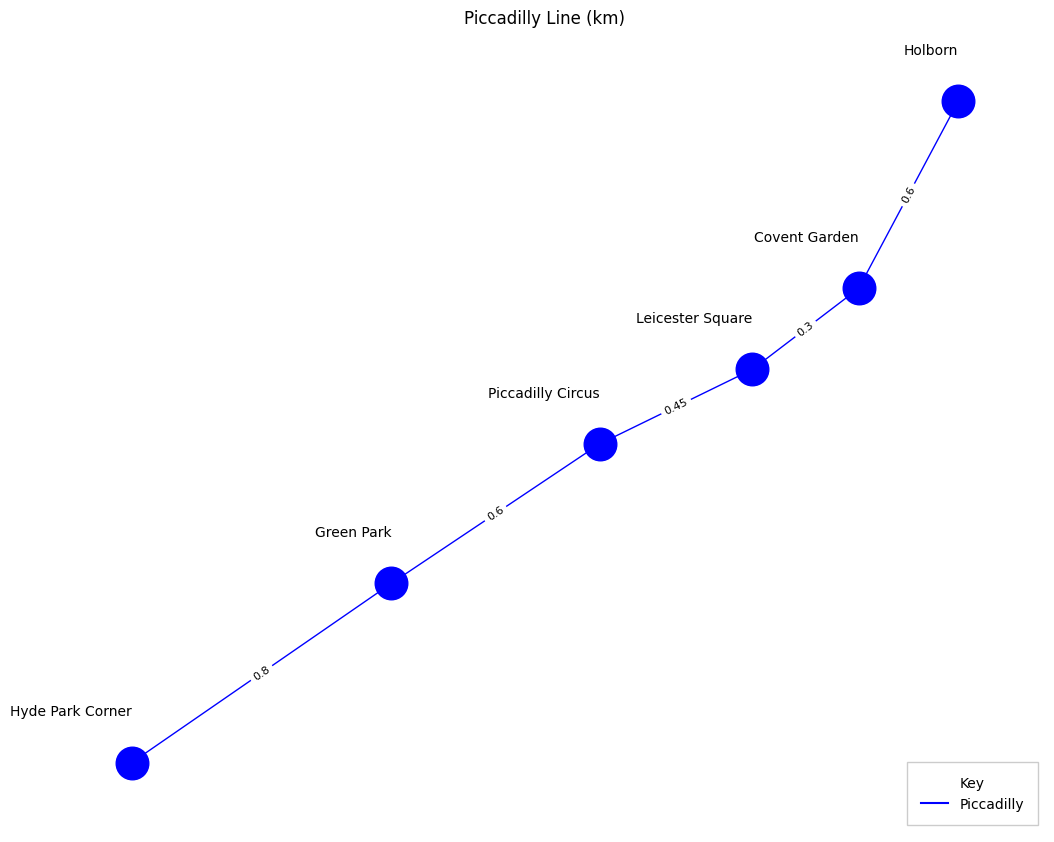

In [48]:
# Create graph and add nodes and edges
G = nx.Graph()
for station, coord in stations.items():
    G.add_node(station, pos=(coord[1], coord[0]))  # Use (longitude, latitude) for plotting

for edge in edges:
    G.add_edge(edge[0], edge[1], weight=edge[2])

# Get node positions and edge labels
pos = nx.get_node_attributes(G, 'pos')
edge_labels = nx.get_edge_attributes(G, 'weight')

# Plot the graph
plt.figure(figsize=(10, 8))
# Draw nodes and edges in blue
nx.draw(
    G, pos, with_labels=False, node_color='blue', edge_color='blue',
    node_size=550
)
# Draw edge labels
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, label_pos=0.5)

# Add station labels above the nodes
for station, (x, y) in pos.items():
    plt.text(x, y + 0.001, station, fontsize=10, ha='right', color='black') 

# Create a custom legend
plt.plot([], [], color="blue", label="Piccadilly")  # Dummy plot for legend
plt.legend(loc="lower right", title="Key", frameon=True, fancybox=False, framealpha=1, borderpad=1)

# Set plot title and display the graph
plt.title("Piccadilly Line (km)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

**Task 2**

In [49]:
#Coordinates base on Apple Map
stations = {
    #Piccadilly-line: 
    "Holborn": (51.517135, -0.120327),  #Piccadily & Central
    "Covent Garden": (51.513124, -0.124221),
    "Leicester Square": (51.511390, -0.128366),
    "Piccadilly Circus": (51.509792, -0.134336),  #Piccadily & Bakerloo
    "Green Park": (51.506800, -0.142481),    #Piccadily & Victoria
    "Hyde Park Corner": (51.502958, -0.152624),

    #Bakerloo-line: 
    "Regent's Park": (51.523471, -0.146340),
    "Oxford Circus": (51.515306, -0.141916),  #Bakerloo & Central & Victoria
    "Baker Street": (51.523226, -0.157255),
    "Charing Cross":(51.508744, -0.125666),
    "Marylebone": (51.522838, -0.162839),

    #Central-line: 
    "Chancery Lane": (51.518181, -0.111475),
    "Tottenham Court Road": (51.516322, -0.130575),
    "Bond Street": (51.514399, -0.149068),
    "Marble Arch": (51.513473, -0.158143),

    #Victoria-line:
    "Euston": (51.529980, -0.135868),
    "Warren Street": (51.524879, -0.138052),
    "Victoria": (51.496436, -0.143863),
    "Pimlico": (51.489018, -0.133260),

    #Northern-line:
    "Goodge Street": (51.520647, -0.134360),
    "Embankment": (51.507111, -0.122372),

    #Jubilee-line:
    "Westminster":(51.501028, -0.125435),
    "Waterloo": (51.502445, -0.113520),
    "Southwark": (51.504294, -0.106104),
    
}


In [50]:
#Distance base on Apple Map
edges = {
    "Piccadilly": [
        ("Holborn", "Covent Garden", 0.6),
        ("Covent Garden", "Leicester Square", 0.3),
        ("Leicester Square", "Piccadilly Circus", 0.5),
        ("Piccadilly Circus", "Green Park", 0.6),
        ("Green Park", "Hyde Park Corner", 0.8)
    ],
    "Bakerloo": [
        ("Marylebone", "Baker Street", 0.4),
        ("Baker Street", "Regent's Park", 0.7),
        ("Regent's Park", "Oxford Circus", 1.1),
        ("Oxford Circus", "Piccadilly Circus", 0.9),
        ("Piccadilly Circus", "Charing Cross", 0.8)
    ],
    "Central": [
        ("Chancery Lane","Holborn", 0.6),
        ("Holborn", "Tottenham Court Road", 0.8),
        ("Tottenham Court Road", "Oxford Circus", 0.8),
        ("Oxford Circus", "Bond Street", 0.5),
        ("Bond Street", "Marble Arch", 0.7)
    ],
    "Victoria": [
        ("Euston", "Warren Street", 0.6),
        ("Warren Street", "Oxford Circus", 1.4),
        ("Oxford Circus", "Green Park", 1.2),
        ("Green Park", "Victoria", 1.4),
        ("Victoria", "Pimlico", 1.1)
    ],
    "Norther": [
        ("Warren Street","Goodge Street", 0.5),
        ("Goodge Street","Tottenham Court Road", 0.5),
        ("Tottenham Court Road","Leicester Square", 0.5),
        ("Leicester Square","Charing Cross", 0.3),
        ("Charing Cross", "Embankment", 0.3),
    ],
    "Jubilee": [
        ("Baker Street", "Bond Street", 1.2),
        ("Bond Street","Green Park", 1.1),
        ("Green Park","Westminster", 1.7),
        ("Westminster","Waterloo", 1.1),
        ("Waterloo", "Southwark", 0.5),
    ]
}

# Colors for each line
line_colors = {
    "Piccadilly": "blue",
    "Bakerloo": "orange",
    "Central": "red",
    "Victoria": "deepskyblue",
    "Norther": "black",
    "Jubilee": "grey"
}


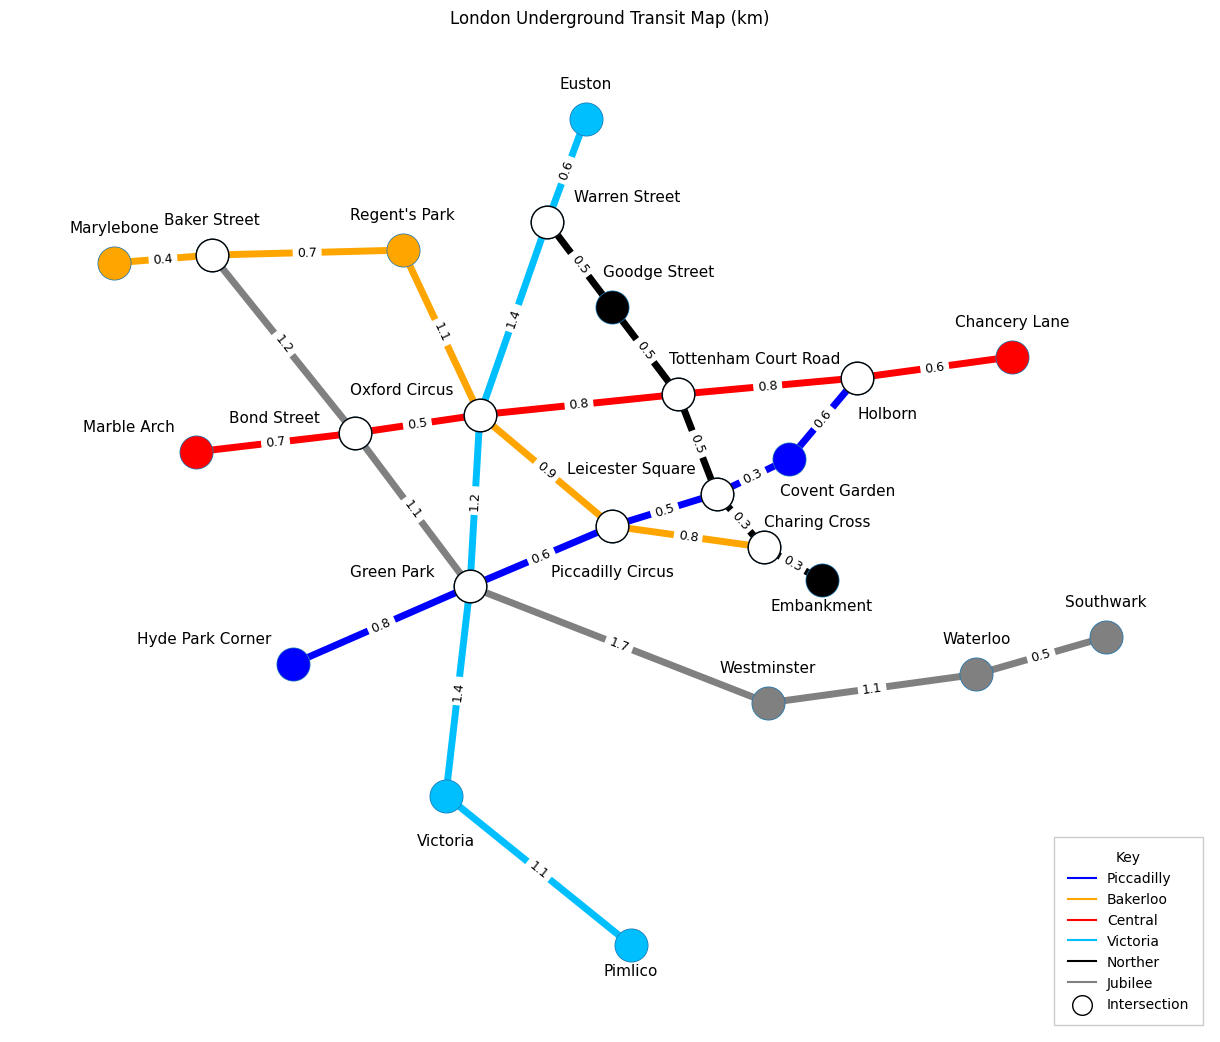

In [51]:
# Create the graph and add nodes and edges
G = nx.Graph()
for station, coord in stations.items():
    G.add_node(station, pos=(coord[1], coord[0]))  # Use (longitude, latitude) for visualization

for line, connections in edges.items():
    for station1, station2, distance in connections:
        G.add_edge(station1, station2, weight=distance, color=line_colors[line])

# Get the positions of the nodes and edge labels
pos = nx.get_node_attributes(G, 'pos')
edge_labels = nx.get_edge_attributes(G, 'weight')
edge_colors = [G[u][v]['color'] for u, v in G.edges()]

# Draw the graph
plt.figure(figsize=(12, 10))

# Draw the nodes and edges with corresponding colors
nx.draw(
    G, pos, with_labels=False, edge_color=edge_colors,
    node_size=550, width=5  # Adjust the size of the lines
)

# Highlight nodes with more than two lines passing through them
special_nodes = ["Oxford Circus", "Green Park", "Piccadilly Circus", "Holborn", 
                 "Warren Street", "Tottenham Court Road", "Leicester Square","Charing Cross",
                 "Baker Street", "Bond Street"]
nx.draw_networkx_nodes(G, pos, nodelist=special_nodes, node_color='white', edgecolors='black', node_size=550)

# Draw the remaining nodes with line-specific colors
orange_nodes = ["Marylebone","Regent's Park"]           # Bakerloo
red_nodes = ["Chancery Lane", "Marble Arch"]            # Central
deepskyblue_nodes = ["Euston", "Victoria","Pimlico"]    # Victoria
blue_nodes = ["Hyde Park Corner", "Covent Garden"]      # Piccadilly
black_nodes = ["Goodge Street","Embankment"]            # Northern
grey_nodes = ["Waterloo","Westminster","Southwark"]     # Jubilee

nx.draw_networkx_nodes(G, pos, nodelist=orange_nodes, node_color='orange', node_size=500)
nx.draw_networkx_nodes(G, pos, nodelist=red_nodes, node_color='red', node_size=500)
nx.draw_networkx_nodes(G, pos, nodelist=deepskyblue_nodes, node_color='deepskyblue', node_size=500)
nx.draw_networkx_nodes(G, pos, nodelist=blue_nodes, node_color='blue', node_size=500)
nx.draw_networkx_nodes(G, pos, nodelist=black_nodes, node_color='black', node_size=500)
nx.draw_networkx_nodes(G, pos, nodelist=grey_nodes, node_color='grey', node_size=500)

# Draw edge labels
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9, label_pos=0.5)

# Add station labels above the nodes
for station, (x, y) in pos.items():
    if station in ["Covent Garden"]:
        plt.text(x - 0.0005, y - 0.0018, station, fontsize=11, ha='left', color='black') 
    elif station in ["Piccadilly Circus","Victoria"]:
        plt.text(x, y - 0.0025, station, fontsize=11, ha='center', color='black')
    elif station in ["Holborn"]:
        plt.text(x, y - 0.002, station, fontsize=11, ha='left', color='black')
    elif station in ["Oxford Circus"]:
        plt.text(x - 0.0015, y + 0.001, station, fontsize=11, ha='right', color='black')
    elif station in ["Green Park", "Bond Street"]:
        plt.text(x - 0.002, y + 0.0005, station, fontsize=11, ha='right', color='black') 
    elif station in ["Warren Street"]:
        plt.text(x + 0.0015, y + 0.001, station, fontsize=11, ha='left', color='black') 
    elif station in ["Leicester Square","Hyde Park Corner", "Marble Arch"]:
        plt.text(x - 0.0012, y + 0.001, station, fontsize=11, ha='right', color='black') 
    elif station in ["Pimlico","Embankment"]:
        plt.text(x, y - 0.0015, station, fontsize=11, ha='center', color='black') 
    elif station in ["Charing Cross"]:
        plt.text(x, y + 0.001, station, fontsize=11, ha='left', color='black')
    elif station in ["Tottenham Court Road","Goodge Street"]:
        plt.text(x -0.0005, y + 0.0015, station, fontsize=11, ha='left', color='black')
    else:
        plt.text(x, y + 0.0015, station, fontsize=11, ha='center', color='black') 

# Create a custom legend
for line, color in line_colors.items():
    plt.plot([], [], color=color, label=line)  # Dummy plot for legend
plt.scatter([], [], color='white', edgecolor='black', s=200, label="Intersection")    
plt.legend(loc="lower right", title="Key", frameon=True, fancybox=False, framealpha=1, borderpad=1)

# Add title and display the graph
plt.title("London Underground Transit Map (km)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()


**Task 3**

In [53]:
# Calculate total length of the transport network (sum of edge weights)
total_length = sum(d['weight'] for u, v, d in G.edges(data=True))

# Calculate average distance between the stations
num_edges = len(G.edges())
average_distance = total_length / num_edges if num_edges > 0 else 0

# Calculate the standard deviation of the distances between the stations
edge_weights = [d['weight'] for u, v, d in G.edges(data=True)]
std_dev_distance = np.std(edge_weights)

# Output the results
print(f"Total Length of the Transport Network: {total_length} km")
print(f"Average Distance Between the Stations: {average_distance:.2f} km")
print(f"Standard Deviation of the Distances: {std_dev_distance:.2f} km")



Total Length of the Transport Network: 23.5 km
Average Distance Between the Stations: 0.78 km
Standard Deviation of the Distances: 0.36 km


**Task 3 show in Task 2**

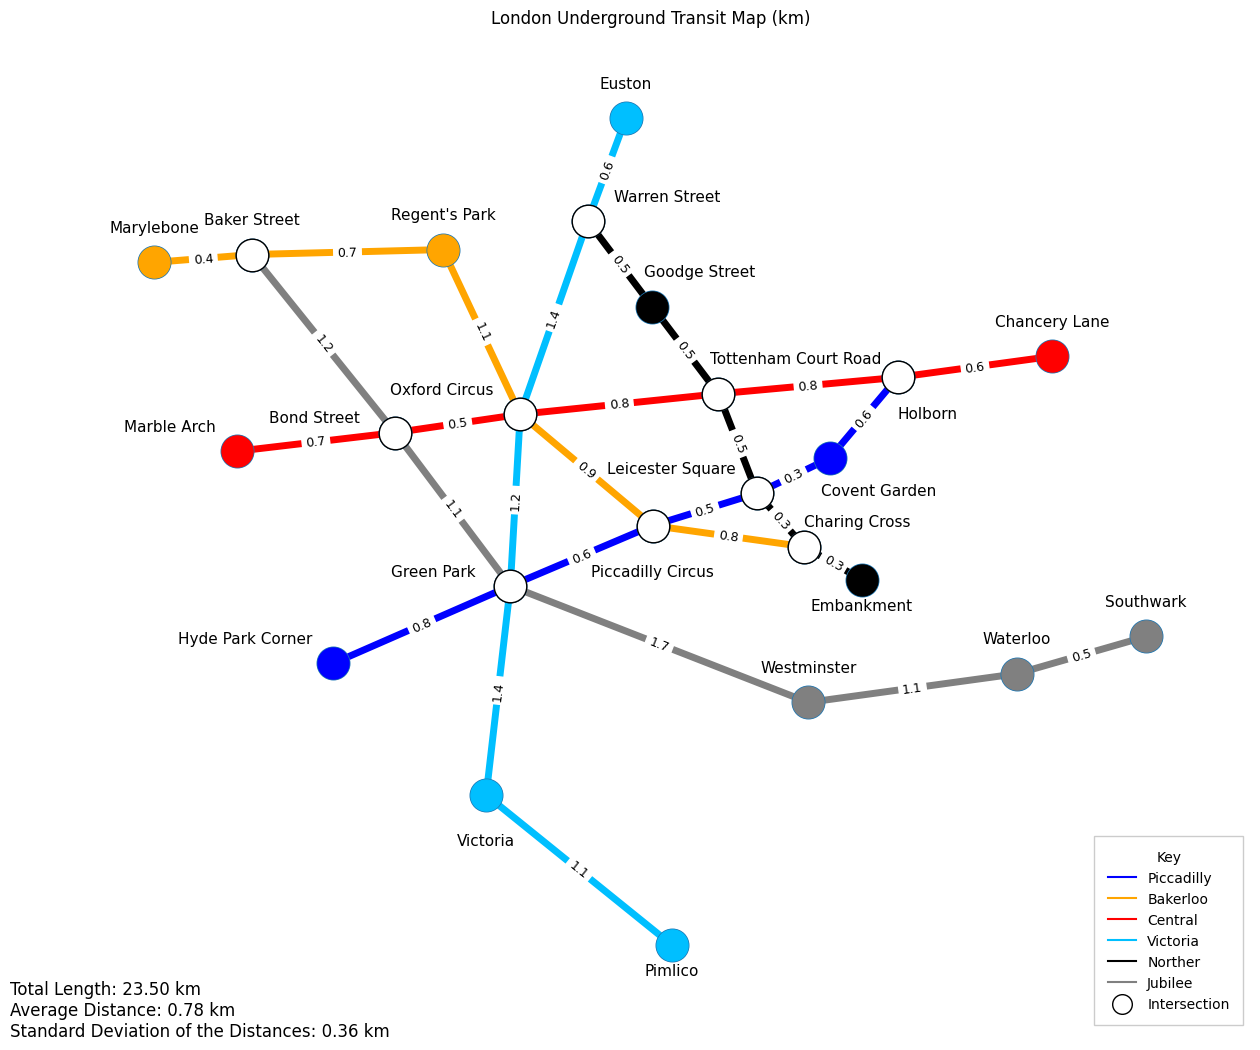

In [54]:

#Coordinates base on Apple Map
stations = {
    #Piccadilly-line: 
    "Holborn": (51.517135, -0.120327),  #Piccadily & Central
    "Covent Garden": (51.513124, -0.124221),
    "Leicester Square": (51.511390, -0.128366),
    "Piccadilly Circus": (51.509792, -0.134336),  #Piccadily & Bakerloo
    "Green Park": (51.506800, -0.142481),    #Piccadily & Victoria
    "Hyde Park Corner": (51.502958, -0.152624),

    #Bakerloo-line: 
    "Regent's Park": (51.523471, -0.146340),
    "Oxford Circus": (51.515306, -0.141916),  #Bakerloo & Central & Victoria
    "Baker Street": (51.523226, -0.157255),
    "Charing Cross":(51.508744, -0.125666),
    "Marylebone": (51.522838, -0.162839),

    #Central-line: 
    "Chancery Lane": (51.518181, -0.111475),
    "Tottenham Court Road": (51.516322, -0.130575),
    "Bond Street": (51.514399, -0.149068),
    "Marble Arch": (51.513473, -0.158143),

    #Victoria-line:
    "Euston": (51.529980, -0.135868),
    "Warren Street": (51.524879, -0.138052),
    "Victoria": (51.496436, -0.143863),
    "Pimlico": (51.489018, -0.133260),

    #Northern-line:
    "Goodge Street": (51.520647, -0.134360),
    "Embankment": (51.507111, -0.122372),

    #Jubilee-line:
    "Westminster":(51.501028, -0.125435),
    "Waterloo": (51.502445, -0.113520),
    "Southwark": (51.504294, -0.106104),
    
}

#Distance base on Apple Map
edges = {
    "Piccadilly": [
        ("Holborn", "Covent Garden", 0.6),
        ("Covent Garden", "Leicester Square", 0.3),
        ("Leicester Square", "Piccadilly Circus", 0.5),
        ("Piccadilly Circus", "Green Park", 0.6),
        ("Green Park", "Hyde Park Corner", 0.8)
    ],
    "Bakerloo": [
        ("Marylebone", "Baker Street", 0.4),
        ("Baker Street", "Regent's Park", 0.7),
        ("Regent's Park", "Oxford Circus", 1.1),
        ("Oxford Circus", "Piccadilly Circus", 0.9),
        ("Piccadilly Circus", "Charing Cross", 0.8)
    ],
    "Central": [
        ("Chancery Lane","Holborn", 0.6),
        ("Holborn", "Tottenham Court Road", 0.8),
        ("Tottenham Court Road", "Oxford Circus", 0.8),
        ("Oxford Circus", "Bond Street", 0.5),
        ("Bond Street", "Marble Arch", 0.7)
    ],
    "Victoria": [
        ("Euston", "Warren Street", 0.6),
        ("Warren Street", "Oxford Circus", 1.4),
        ("Oxford Circus", "Green Park", 1.2),
        ("Green Park", "Victoria", 1.4),
        ("Victoria", "Pimlico", 1.1)
    ],
    "Norther": [
        ("Warren Street","Goodge Street", 0.5),
        ("Goodge Street","Tottenham Court Road", 0.5),
        ("Tottenham Court Road","Leicester Square", 0.5),
        ("Leicester Square","Charing Cross", 0.3),
        ("Charing Cross", "Embankment", 0.3),
    ],
    "Jubilee": [
        ("Baker Street", "Bond Street", 1.2),
        ("Bond Street","Green Park", 1.1),
        ("Green Park","Westminster", 1.7),
        ("Westminster","Waterloo", 1.1),
        ("Waterloo", "Southwark", 0.5),
    ]
}

# Colors for each line
line_colors = {
    "Piccadilly": "blue",
    "Bakerloo": "orange",
    "Central": "red",
    "Victoria": "deepskyblue",
    "Norther": "black",
    "Jubilee": "grey"
}

# Create the graph and add nodes and edges
G = nx.Graph()
for station, coord in stations.items():
    G.add_node(station, pos=(coord[1], coord[0]))  # Use (longitude, latitude) for visualization

for line, connections in edges.items():
    for station1, station2, distance in connections:
        G.add_edge(station1, station2, weight=distance, color=line_colors[line])

# Calculate network statistics
total_length = sum(nx.get_edge_attributes(G, 'weight').values())
num_edges = G.number_of_edges()
average_distance = total_length / num_edges if num_edges > 0 else 0
edge_weights = list(nx.get_edge_attributes(G, 'weight').values())
std_dev_distance = np.std(edge_weights)

# Prepare results text
result_task_3 = (
    f"Total Length: {total_length:.2f} km\n"
    f"Average Distance: {average_distance:.2f} km\n"
    f"Standard Deviation of the Distances: {std_dev_distance:.2f} km"
)

# Get the positions of the nodes and edge labels
pos = nx.get_node_attributes(G, 'pos')
edge_labels = nx.get_edge_attributes(G, 'weight')
edge_colors = [G[u][v]['color'] for u, v in G.edges()]

# Draw the graph
plt.figure(figsize=(12, 10))

# Draw the nodes and edges with corresponding colors
nx.draw(
    G, pos, with_labels=False, edge_color=edge_colors,
    node_size=550, width=5  # Adjust the size of the lines
)

# Highlight nodes with more than two lines passing through them
special_nodes = ["Oxford Circus", "Green Park", "Piccadilly Circus", "Holborn", 
                 "Warren Street", "Tottenham Court Road", "Leicester Square","Charing Cross",
                 "Baker Street", "Bond Street"]
nx.draw_networkx_nodes(G, pos, nodelist=special_nodes, node_color='white', edgecolors='black', node_size=550)

# Draw the remaining nodes with line-specific colors
orange_nodes = ["Marylebone","Regent's Park"]           # Bakerloo
red_nodes = ["Chancery Lane", "Marble Arch"]            # Central
deepskyblue_nodes = ["Euston", "Victoria","Pimlico"]    # Victoria
blue_nodes = ["Hyde Park Corner", "Covent Garden"]      # Piccadilly
black_nodes = ["Goodge Street","Embankment"]            # Northern
grey_nodes = ["Waterloo","Westminster","Southwark"]     # Jubilee

nx.draw_networkx_nodes(G, pos, nodelist=orange_nodes, node_color='orange', node_size=500)
nx.draw_networkx_nodes(G, pos, nodelist=red_nodes, node_color='red', node_size=500)
nx.draw_networkx_nodes(G, pos, nodelist=deepskyblue_nodes, node_color='deepskyblue', node_size=500)
nx.draw_networkx_nodes(G, pos, nodelist=blue_nodes, node_color='blue', node_size=500)
nx.draw_networkx_nodes(G, pos, nodelist=black_nodes, node_color='black', node_size=500)
nx.draw_networkx_nodes(G, pos, nodelist=grey_nodes, node_color='grey', node_size=500)

# Draw edge labels
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9, label_pos=0.5)

# Add station labels above the nodes
for station, (x, y) in pos.items():
    if station in ["Covent Garden"]:
        plt.text(x - 0.0005, y - 0.0018, station, fontsize=11, ha='left', color='black') 
    elif station in ["Piccadilly Circus","Victoria"]:
        plt.text(x, y - 0.0025, station, fontsize=11, ha='center', color='black')
    elif station in ["Holborn"]:
        plt.text(x, y - 0.002, station, fontsize=11, ha='left', color='black')
    elif station in ["Oxford Circus"]:
        plt.text(x - 0.0015, y + 0.001, station, fontsize=11, ha='right', color='black')
    elif station in ["Green Park", "Bond Street"]:
        plt.text(x - 0.002, y + 0.0005, station, fontsize=11, ha='right', color='black') 
    elif station in ["Warren Street"]:
        plt.text(x + 0.0015, y + 0.001, station, fontsize=11, ha='left', color='black') 
    elif station in ["Leicester Square","Hyde Park Corner", "Marble Arch"]:
        plt.text(x - 0.0012, y + 0.001, station, fontsize=11, ha='right', color='black') 
    elif station in ["Pimlico","Embankment"]:
        plt.text(x, y - 0.0015, station, fontsize=11, ha='center', color='black') 
    elif station in ["Charing Cross"]:
        plt.text(x, y + 0.001, station, fontsize=11, ha='left', color='black')
    elif station in ["Tottenham Court Road","Goodge Street"]:
        plt.text(x -0.0005, y + 0.0015, station, fontsize=11, ha='left', color='black')
    else:
        plt.text(x, y + 0.0015, station, fontsize=11, ha='center', color='black') 

# Add results text in bottom-left corner
plt.text(x -0.065, y - 0.02, result_task_3, fontsize=12, color="black", ha="left", va="bottom")

# Create a custom legend
for line, color in line_colors.items():
    plt.plot([], [], color=color, label=line)  # Dummy plot for legend
plt.scatter([], [], color='white', edgecolor='black', s=200, label="Intersection")    
plt.legend(loc="lower right", title="Key", frameon=True, fancybox=False, framealpha=1, borderpad=1)

# Add title and display the graph
plt.title("London Underground Transit Map (km)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

